#### K-means customer segmentation is a data analysis method that separates a client base into groups or clusters depending on how similar they are to one another in terms of certain qualities or characteristics. 
#### In order for organisations to better understand their customers and adjust their marketing and service strategies appropriately, K-means clustering seeks to find patterns and links within customer data. 
#### consumers are grouped into clusters iteratively, with each cluster consisting of consumers who are more similar to one another than to customers in other clusters. 
#### Based on the distinct demands and preferences of each group, this assists organisations in focusing their marketing efforts, optimising their product offerings, and enhancing customer experiences, ultimately resulting in higher customer satisfaction and greater company success.


#### IMPORTING REQUIRED LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import sklearn as sns
from sklearn.cluster import KMeans

#### Data loading

In [2]:
customer_data = pd.read_csv('Mall_customers.csv')

In [3]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Checking missing values

In [4]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### To know number of rows and columns in a data use---> shape

In [5]:
customer_data.shape

(200, 5)

In [10]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### Choosing annual income and spending column

In [40]:
x = customer_data.iloc[:,[3,4]].values

In [41]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

#### Choosing number of clusters

WCSS ---> Within Cluster Sum of Squares

In [56]:
## Finding WCSS value for different number of clusters
wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)

    wcss.append(kmeans.inertia_)

#### Ploting ELBOW-GRAPH to understand optimanl k-value 

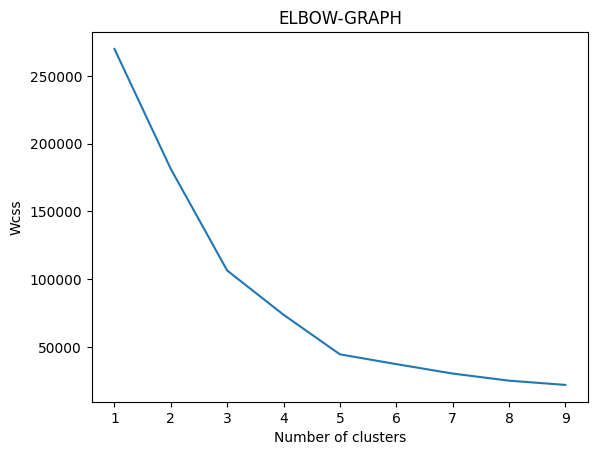

In [59]:
plt.plot(range(1,10),wcss)
plt.title('ELBOW-GRAPH')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')
plt.show()

#### Training KMeans model

In [64]:
kmeans = KMeans(n_clusters=5, init='k-means++',random_state=42)

#return label for each data point based on their cluster
y = kmeans.fit_predict(x)
print(y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


#### Visulazing all the clusters

Text(0, 0.5, 'Spending-Score')

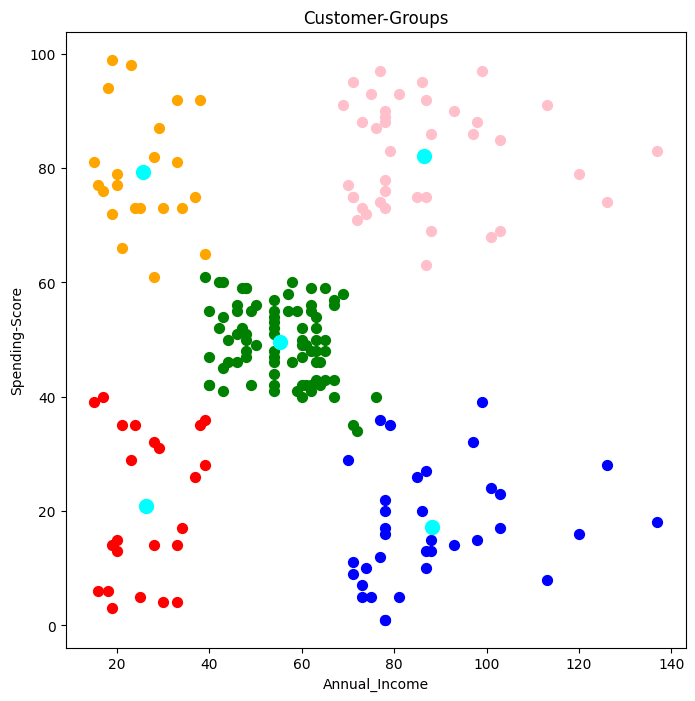

In [69]:
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0] , x[y==0,1],s=50 , c='green' , label='Cluster-1')
plt.scatter(x[y==1,0] , x[y==1,1],s=50 , c='blue' , label='Cluster-2')
plt.scatter(x[y==2,0] , x[y==2,1],s=50 , c='red' , label='Cluster-3')
plt.scatter(x[y==3,0] , x[y==3,1],s=50 , c='orange' , label='Cluster-4')
plt.scatter(x[y==4,0] , x[y==4,1],s=50 , c='pink' , label='Cluster-5')

#ploting centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan' , label='centroids')
plt.title('Customer-Groups')
plt.xlabel('Annual_Income')
plt.ylabel('Spending-Score')

#### Conclusion

---> As a E-commerce platform is it necessary to understand the customer and also their needs , likes and dislikes.

---> To improve business, we have to make data driven decision

---> From above analysis we found out that,inorder to improve business we need to make some CLV stratagies like 

        *Providing Cupons
        
        *Giving offers by indentifying the right customers
        
        *Thanking you Emails
        
        *Safer payment mode
        
        *Recommandations based on their intrest
        
        *Best price
        
        *Listen to Your Customers – Collect Actionable Feedback
        
        *Detect Common Pain Points & Provide Solutions
        
        *Run Loyalty Programs